In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
districtCropProductionInputs = pd.read_csv("ECO221_Project_2025_Final.csv")
districtRainfall = pd.read_csv("RF_DistrictWise_ECO221_2025.csv")
districtSoil = pd.read_csv("Salinity_Alkalinity_ECO221_2025.csv")

In [3]:
maizeProductionInputs = districtCropProductionInputs[districtCropProductionInputs["crop"] == "Maize"]

In [4]:
maizeProductionInputs

,crop,area1000hectares,production1000tonnes,irrigatedarea1000hectares,districtcode,year,statecode,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,potashconsumptiontonnes,districtname
14,Maize,9.250000,18.09000,1.473,1,2017,14,Chhattisgarh,91447,53486,16993,Durg
38,Maize,41.939999,120.22000,10.145,2,2017,14,Chhattisgarh,21279,12584,4271,Bastar
61,Maize,6.130000,13.67000,1.463,3,2017,14,Chhattisgarh,92008,47721,15054,Raipur
72,Maize,7.610000,15.83000,0.018,4,2017,14,Chhattisgarh,72926,29713,6915,Bilaspur
109,Maize,6.290000,15.81000,0.056,5,2017,14,Chhattisgarh,31282,13620,3707,Raigarh
...,...,...,...,...,...,...,...,...,...,...,...,...
5758,Maize,64.330002,139.50999,0.000,913,2017,15,Jharkhand,15376,11091,1486,Hazaribagh
5769,Maize,4.950000,11.50000,0.000,914,2017,15,Jharkhand,427,297,82,Dhanbad
5787,Maize,66.320000,93.25000,0.000,915,2017,15,Jharkhand,16063,8959,1702,Palamau
5816,Maize,39.610001,103.50000,0.000,916,2017,15,Jharkhand,28893,20374,3949,Ranchi


We have districts that have the same name but are present in different states

In [5]:
districts1 = maizeProductionInputs[["districtname", "statename"]].drop_duplicates()
districts1 = list(districts1.itertuples(index = False, name = None))

In [6]:
districts2 = districtRainfall[["district", "state"]].drop_duplicates()
districts2 = list(districts2.itertuples(index = False, name = None))

In [7]:
for district in districts1:
    if district not in districts2:
        print(district)

('Seoni / Shivani', 'Madhya Pradesh')
('Visakhapatnam', 'Andhra Pradesh')
('S.P.S. Nellore', 'Andhra Pradesh')
('Ananthapur', 'Andhra Pradesh')
('Kadapa YSR', 'Andhra Pradesh')
('Bangalore', 'Karnataka')
('Tumkur', 'Karnataka')
('Mysore', 'Karnataka')
('Bellary', 'Karnataka')
('Belgaum', 'Karnataka')
('Bijapur / Vijayapura', 'Karnataka')
('Gulbarga / Kalaburagi', 'Karnataka')
('Kodagu / Coorg', 'Karnataka')
('South Arcot / Cuddalore', 'Tamil Nadu')
('North Arcot / Vellore', 'Tamil Nadu')
('Tiruchirapalli / Trichy', 'Tamil Nadu')
('Ramananthapuram', 'Tamil Nadu')
('Thirunelveli', 'Tamil Nadu')
('Kanyakumari', 'Tamil Nadu')
('Amarawati', 'Maharashtra')
('Ahmedabad', 'Gujarat')
('Banaskantha', 'Gujarat')
('Vadodara / Baroda', 'Gujarat')
('Dangs', 'Gujarat')
('Sabarkantha', 'Gujarat')
('Swami Madhopur', 'Rajasthan')
('Roopnagar / Ropar', 'Punjab')
('Ferozpur', 'Punjab')
('Bhatinda', 'Punjab')
('Hissar', 'Haryana')
('Gurgaon', 'Haryana')
('Mahendragarh / Narnaul', 'Haryana')
('Buland Shahar

In [8]:
missingMappings12 = {
    "Seoni / Shivani": "Seoni",
    "Visakhapatnam": "Visakhapatanam",
    "S.P.S. Nellore": "Spsr Nellore",
    "Ananthapur": "Anantapur",
    "Kadapa YSR": "Y.S.R.",
    "Bangalore": "Bengaluru Urban",
    "Tumkur": "Tumakuru",
    "Mysore": "Mysuru",
    "Bellary": "Ballari",
    "Belgaum": "Belagavi",
    "Bijapur / Vijayapura": "Vijayapura",
    "Gulbarga / Kalaburagi": "Kalaburagi",
    "Kodagu / Coorg": "Kodagu",
    "South Arcot / Cuddalore": "Cuddalore",
    "North Arcot / Vellore": "Vellore",
    "Tiruchirapalli / Trichy": "Tiruchirappalli",
    "Ramananthapuram": "Ramanathapuram",
    "Thirunelveli": "Tirunelveli",
    "Kanyakumari": "Kanniyakumari",
    "Amarawati": "Amravati",
    "Ahmedabad": "Ahmadabad",
    "Banaskantha": "Banas Kantha",
    "Vadodara / Baroda": "Vadodara",
    "Dangs": "Dang",
    "Sabarkantha": "Sabar Kantha",
    "Swami Madhopur": "Sawai Madhopur",
    "Roopnagar / Ropar": "Rupnagar",
    "Ferozpur": "Ferozepur",
    "Bhatinda": "Bathinda",
    "Hissar": "Hisar",
    "Gurgaon": "Gurugram",
    "Mahendragarh / Narnaul": "Mahendragarh",
    "Buland Shahar": "Bulandshahr",
    "Kanpur": "Kanpur Nagar",
    "Allahabad": "Prayagraj",
    "Rae-Bareily": "Rae Bareli",
    "Faizabad": "Ayodhya",
    "Almorah": "Almora",
    "Pithorgarh": "Pithoragarh",
    "Garhwal": "Pauri Garhwal",
    "Bilashpur": "Bilaspur",
    "Lahul & Spiti": "Lahul And Spiti",
    "Champaran": "Purbi Champaran",
    "Mungair": "Munger",
    "Santhal Paragana / Dumka": "Dumka",
    "Shahabad (now part of Bhojpur district)": "Bhojpur",
    "Palamau": "Palamu",
    "Singhbhum": "West Singhbhum"
}

In [9]:
districtMappings12 = {}
for d1 in districts1:
    districtName = d1[0]
    stateName = d1[1]
    if districtName in missingMappings12:
        districtName = missingMappings12[districtName]

    for d2 in districts2:
        if d2[0] == districtName and d2[1] == stateName:
            districtMappings12[d1] = d2

Maize is grown during Kharif season (June to October)

In [10]:
requiredRainfallDistricts = set(list(districtMappings12.values()))

# filter for required districts
maizeRainfall = districtRainfall[
    districtRainfall.apply(lambda row: (row["district"], row["state"]) in requiredRainfallDistricts, axis = 1)
]

# filter for crop months
maizeRainfall = maizeRainfall[(maizeRainfall['monthcode'] >= 201706) & (maizeRainfall['monthcode'] <= 201710)]

# group by district and sum rainfall
groupCols = ['country', 'statelgdcode', 'state', 'districtlgdcode', 'district', 'yearcode', 'year']
maizeRainfall = (
    maizeRainfall
    .groupby(groupCols, as_index = False)
    .agg({'rf': 'sum'})
    .rename(columns = {'rf': 'totalRainfall'})
)

In [11]:
districts3 = list(districtSoil["District Name"].unique())

for district in districtMappings12.values():
    dName = district[0]
    if dName not in districts3:
        print(dName)

Spsr Nellore
Warangal
Ferozepur
Lahul And Spiti


In [12]:
missingMappings23 = {
    "Spsr Nellore": "SPSR Nellore",
    "Warangal": "Warangal Urban",
    "Ferozepur": "Firozepur",
    "Lahul And Spiti": "Lahul & Spiti"
}

In [13]:
districtMappings23 = {}
for district in districtMappings12.values():
    dName = district[0]
    if dName in missingMappings23:
        districtMappings23[dName] = missingMappings23[dName]
    else:
         districtMappings23[dName] = dName

## Task 1

In [14]:
maize12 = maizeProductionInputs.copy()

maize12[['dname', 'sname']] = (
    maize12.apply(lambda row: pd.Series(districtMappings12.get((row['districtname'], row['statename']), (None, None))), axis = 1)
)

maize12 = pd.merge(
    maize12,
    maizeRainfall,
    left_on = ['dname', 'sname'],
    right_on = ['district', 'state'],
    how = 'inner'
)

maize12 = maize12.drop(columns = ['dname', 'sname'])

In [15]:
maize12

,crop,area1000hectares,production1000tonnes,irrigatedarea1000hectares,districtcode,year_x,statecode,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,potashconsumptiontonnes,districtname,country,statelgdcode,state,districtlgdcode,district,yearcode,year_y,totalRainfall
0,Maize,9.250000,18.09000,1.473,1,2017,14,Chhattisgarh,91447,53486,16993,Durg,India,22,Chhattisgarh,378,Durg,2017,"Calendar Year (Jan - Dec), 2017",841.829998
1,Maize,41.939999,120.22000,10.145,2,2017,14,Chhattisgarh,21279,12584,4271,Bastar,India,22,Chhattisgarh,374,Bastar,2017,"Calendar Year (Jan - Dec), 2017",884.629990
2,Maize,6.130000,13.67000,1.463,3,2017,14,Chhattisgarh,92008,47721,15054,Raipur,India,22,Chhattisgarh,387,Raipur,2017,"Calendar Year (Jan - Dec), 2017",667.999988
3,Maize,7.610000,15.83000,0.018,4,2017,14,Chhattisgarh,72926,29713,6915,Bilaspur,India,22,Chhattisgarh,375,Bilaspur,2017,"Calendar Year (Jan - Dec), 2017",624.690000
4,Maize,6.290000,15.81000,0.056,5,2017,14,Chhattisgarh,31282,13620,3707,Raigarh,India,22,Chhattisgarh,386,Raigarh,2017,"Calendar Year (Jan - Dec), 2017",587.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Maize,64.330002,139.50999,0.000,913,2017,15,Jharkhand,15376,11091,1486,Hazaribagh,India,20,Jharkhand,332,Hazaribagh,2017,"Calendar Year (Jan - Dec), 2017",1260.060020
262,Maize,4.950000,11.50000,0.000,914,2017,15,Jharkhand,427,297,82,Dhanbad,India,20,Jharkhand,325,Dhanbad,2017,"Calendar Year (Jan - Dec), 2017",1103.370020
263,Maize,66.320000,93.25000,0.000,915,2017,15,Jharkhand,16063,8959,1702,Palamau,India,20,Jharkhand,338,Palamu,2017,"Calendar Year (Jan - Dec), 2017",787.859990
264,Maize,39.610001,103.50000,0.000,916,2017,15,Jharkhand,28893,20374,3949,Ranchi,India,20,Jharkhand,339,Ranchi,2017,"Calendar Year (Jan - Dec), 2017",1275.550008


## Task 2

In [16]:
maize123 = maize12.copy()

maize123[['dname']] = (
    maize123.apply(lambda row: pd.Series(districtMappings23.get(row['district'], None)), axis = 1)
)

maize123 = pd.merge(
    maize123,
    districtSoil,
    left_on = ['dname'],
    right_on = ['District Name'],
    how = 'inner'
)

maize123 = maize123.drop(columns = ['dname'])

In [17]:
maize123.to_csv("maizeMerged.csv", index = False)
maize123

,crop,area1000hectares,production1000tonnes,irrigatedarea1000hectares,districtcode,year_x,statecode,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,...,country,statelgdcode,state,districtlgdcode,district,yearcode,year_y,totalRainfall,District Name,Average Salinity/Alkalinity (Percentage)
0,Maize,9.250000,18.09000,1.473,1,2017,14,Chhattisgarh,91447,53486,...,India,22,Chhattisgarh,378,Durg,2017,"Calendar Year (Jan - Dec), 2017",841.829998,Durg,0.000000
1,Maize,41.939999,120.22000,10.145,2,2017,14,Chhattisgarh,21279,12584,...,India,22,Chhattisgarh,374,Bastar,2017,"Calendar Year (Jan - Dec), 2017",884.629990,Bastar,0.000000
2,Maize,6.130000,13.67000,1.463,3,2017,14,Chhattisgarh,92008,47721,...,India,22,Chhattisgarh,387,Raipur,2017,"Calendar Year (Jan - Dec), 2017",667.999988,Raipur,0.000000
3,Maize,7.610000,15.83000,0.018,4,2017,14,Chhattisgarh,72926,29713,...,India,22,Chhattisgarh,375,Bilaspur,2017,"Calendar Year (Jan - Dec), 2017",624.690000,Bilaspur,0.390813
4,Maize,6.290000,15.81000,0.056,5,2017,14,Chhattisgarh,31282,13620,...,India,22,Chhattisgarh,386,Raigarh,2017,"Calendar Year (Jan - Dec), 2017",587.570000,Raigarh,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Maize,64.330002,139.50999,0.000,913,2017,15,Jharkhand,15376,11091,...,India,20,Jharkhand,332,Hazaribagh,2017,"Calendar Year (Jan - Dec), 2017",1260.060020,Hazaribagh,0.000000
262,Maize,4.950000,11.50000,0.000,914,2017,15,Jharkhand,427,297,...,India,20,Jharkhand,325,Dhanbad,2017,"Calendar Year (Jan - Dec), 2017",1103.370020,Dhanbad,0.000000
263,Maize,66.320000,93.25000,0.000,915,2017,15,Jharkhand,16063,8959,...,India,20,Jharkhand,338,Palamu,2017,"Calendar Year (Jan - Dec), 2017",787.859990,Palamu,0.000000
264,Maize,39.610001,103.50000,0.000,916,2017,15,Jharkhand,28893,20374,...,India,20,Jharkhand,339,Ranchi,2017,"Calendar Year (Jan - Dec), 2017",1275.550008,Ranchi,0.000000


## Question 1

### Dataset Variables
The dataset contains information about maize production across various districts in India for the year 2017.

crop: Single value "Maize" for all entries

area1000hectares: Area used for maize cultivation in thousands of hectares (ranges from 0 to 270.3)

production1000tonnes: Maize produced in thousands of tonnes (ranges from 0.01 to 1326.45)

irrigatedarea1000hectares: Irrigated area for maize in thousands of hectares (ranges from 0 to 104.61)

districtcode: Numerical identifier for districts

statename/state: Names of Indian states where cultivation occurred

Fertilizer consumption:

nitrogenconsumptiontonnes: Ranges from 75 to 294,303 tonnes

phosphateconsumptiontonnes: Ranges from 33 to 93,574 tonnes

potashconsumptiontonnes: Ranges from 2 to 74,158 tonnes

totalRainfall: Precipitation measure (ranges from 0 to 4,369.61)

Average Salinity/Alkalinity (Percentage): Soil condition measure (ranges from 0 to 96.6%)

The dataset contains 266 entries representing different districts, with 26 rows missing values in key columns.

In [18]:
maizeCleaned = maize123.copy()
checkColumns = ['area1000hectares', 'production1000tonnes', 'irrigatedarea1000hectares']

missingDataRows = maizeCleaned[maizeCleaned[checkColumns].isnull().all(axis = 1)]
print(f"Rows with missing data: {len(missingDataRows)}")

maizeCleaned = maizeCleaned.dropna(subset = checkColumns, how = 'all')
print(f"Rows after removing complete missing data: {len(maizeCleaned)}")

inconsistentRows = maizeCleaned[maizeCleaned['irrigatedarea1000hectares'] > maizeCleaned['area1000hectares']]
print(f"Rows where irrigated area > total area: {len(inconsistentRows)}")

maizeCleaned.loc[maizeCleaned['irrigatedarea1000hectares'] > maizeCleaned['area1000hectares'],
'irrigatedarea1000hectares'] = maizeCleaned.loc[maizeCleaned['irrigatedarea1000hectares'] > maizeCleaned['area1000hectares'], 'area1000hectares']

maizeCleaned["totalAreaNew"] = maizeCleaned["area1000hectares"] + 1
maizeCleaned['irrigatedAreaNew'] = maizeCleaned['irrigatedarea1000hectares'] + 1

maizeCleaned['unirrigatedArea'] = maizeCleaned['totalAreaNew'] - maizeCleaned['irrigatedAreaNew']
maizeCleaned['soilCondition'] = maizeCleaned["Average Salinity/Alkalinity (Percentage)"]

Rows with missing data: 26
Rows after removing complete missing data: 240
Rows where irrigated area > total area: 20


In [19]:
maizeCleaned.drop(["area1000hectares", "irrigatedarea1000hectares", "districtcode", "year_x", "statecode", "country", "statelgdcode", "state", "districtlgdcode", "district", "yearcode", "year_y", "District Name", "Average Salinity/Alkalinity (Percentage)"], axis = 1, inplace = True)
maizeCleaned

,crop,production1000tonnes,statename,nitrogenconsumptiontonnes,phosphateconsumptiontonnes,potashconsumptiontonnes,districtname,totalRainfall,totalAreaNew,irrigatedAreaNew,unirrigatedArea,soilCondition
0,Maize,18.09000,Chhattisgarh,91447,53486,16993,Durg,841.829998,10.250000,2.473,7.777000,0.000000
1,Maize,120.22000,Chhattisgarh,21279,12584,4271,Bastar,884.629990,42.939999,11.145,31.794999,0.000000
2,Maize,13.67000,Chhattisgarh,92008,47721,15054,Raipur,667.999988,7.130000,2.463,4.667000,0.000000
3,Maize,15.83000,Chhattisgarh,72926,29713,6915,Bilaspur,624.690000,8.610000,1.018,7.592000,0.390813
4,Maize,15.81000,Chhattisgarh,31282,13620,3707,Raigarh,587.570000,7.290000,1.056,6.234000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
261,Maize,139.50999,Jharkhand,15376,11091,1486,Hazaribagh,1260.060020,65.330002,1.000,64.330002,0.000000
262,Maize,11.50000,Jharkhand,427,297,82,Dhanbad,1103.370020,5.950000,1.000,4.950000,0.000000
263,Maize,93.25000,Jharkhand,16063,8959,1702,Palamau,787.859990,67.320000,1.000,66.320000,0.000000
264,Maize,103.50000,Jharkhand,28893,20374,3949,Ranchi,1275.550008,40.610001,1.000,39.610001,0.000000


In [20]:
print("Dataset Shape:", maizeCleaned.shape)
print("Columns in the dataset:")
print(maizeCleaned.columns.tolist())
print("Basic statistics for numerical variables:")
print(maizeCleaned.describe())

Dataset Shape: (240, 12)
Columns in the dataset:
['crop', 'production1000tonnes', 'statename', 'nitrogenconsumptiontonnes', 'phosphateconsumptiontonnes', 'potashconsumptiontonnes', 'districtname', 'totalRainfall', 'totalAreaNew', 'irrigatedAreaNew', 'unirrigatedArea', 'soilCondition']
Basic statistics for numerical variables:
       production1000tonnes  nitrogenconsumptiontonnes  \
count            240.000000                 240.000000   
mean             113.787042               54105.479167   
std              190.888577               40050.191462   
min                0.010000                  75.000000   
25%                4.132500               25416.500000   
50%               29.885000               46340.000000   
75%              145.089995               77503.500000   
max             1326.450000              234282.000000   

       phosphateconsumptiontonnes  potashconsumptiontonnes  totalRainfall  \
count                   240.00000               240.000000     240.00000

In [21]:
# Log Transformation for Cobb-Douglas Production Function
maizeCleaned['log_production'] = np.log(maizeCleaned['production1000tonnes'])
maizeCleaned['log_area'] = np.log(maizeCleaned['totalAreaNew'])
maizeCleaned['log_nitrogen'] = np.log(maizeCleaned['nitrogenconsumptiontonnes'])
maizeCleaned['log_phosphate'] = np.log(maizeCleaned['phosphateconsumptiontonnes'])
maizeCleaned['log_potash'] = np.log(maizeCleaned['potashconsumptiontonnes'])
maizeCleaned['log_irrigated_area'] = np.log(maizeCleaned['irrigatedAreaNew'])
maizeCleaned['log_unirrigated_area'] = np.log(maizeCleaned['unirrigatedArea'].replace(0, 1e-10))

maizeCleaned.to_csv("maizeCleaned.csv", index = False)

## Question 2

In [22]:
# Define the formula for the regression model
formula = ('log_production ~ log_area + log_nitrogen + log_phosphate + log_potash + '
           'log_irrigated_area + log_unirrigated_area + totalRainfall + soilCondition')
model = smf.ols(formula = formula, data = maizeCleaned).fit()

In [23]:
print("Cobb-Douglas Production Function Estimation Results:")
print(model.summary())

Cobb-Douglas Production Function Estimation Results:
                            OLS Regression Results                            
Dep. Variable:         log_production   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          7.68e-100
Time:                        07:58:01   Log-Likelihood:                -318.82
No. Observations:                 240   AIC:                             655.6
Df Residuals:                     231   BIC:                             687.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

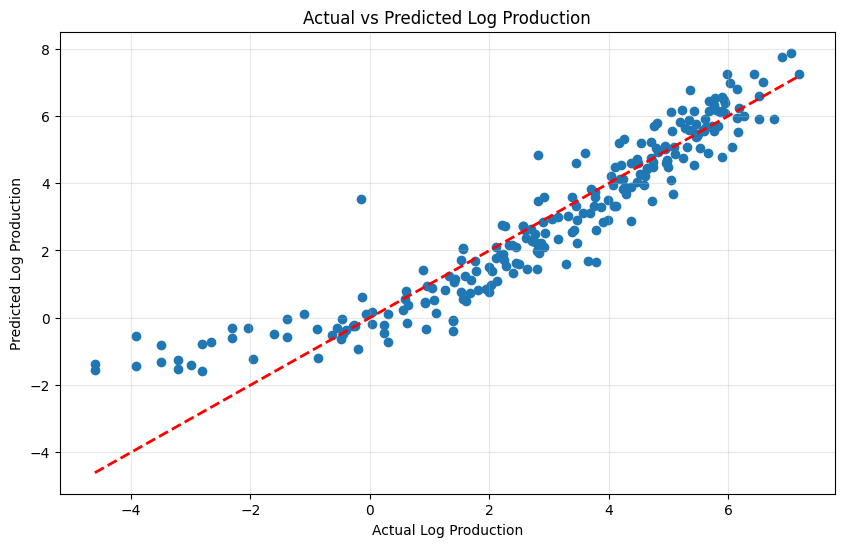

In [24]:
# Plot actual vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(maizeCleaned['log_production'], model.fittedvalues)
plt.plot([maizeCleaned['log_production'].min(), maizeCleaned['log_production'].max()],
         [maizeCleaned['log_production'].min(), maizeCleaned['log_production'].max()],
         'r--', lw = 2)
plt.xlabel('Actual Log Production')
plt.ylabel('Predicted Log Production')
plt.title('Actual vs Predicted Log Production')
plt.grid(True, alpha = 0.3)
plt.show()

In [25]:
# Calculate elasticities (coefficients in the log-linear model)
print("Elasticities (Input Effectiveness):")
for name, coef in zip(model.params.index[1:], model.params[1:]):
    print(f"{name}: {coef:.4f}")

# Calculate technology factor (A)
techFactor = np.exp(model.params.iloc[0])
print(f"Technology Factor (A): {techFactor:.4f}")

Elasticities (Input Effectiveness):
log_area: 1.3558
log_nitrogen: 0.1828
log_phosphate: -0.2216
log_potash: 0.0841
log_irrigated_area: 0.1774
log_unirrigated_area: 0.0349
totalRainfall: -0.0001
soilCondition: -0.0029
Technology Factor (A): 0.4007


In [26]:
inputVars = ['log_area', 'log_nitrogen', 'log_phosphate', 'log_potash',
              'log_irrigated_area', 'log_unirrigated_area']
significantInputs = [(var, model.params[var]) for var in inputVars
                      if model.pvalues[var] < 0.05]

estimatedFunction = f"Y = {techFactor:.4f}"
for var, param in significantInputs:
    varName = var.split('_')[1].capitalize()
    estimatedFunction += f" × {varName}^{param:.4f}"

print("Estimated Cobb-Douglas Production Function:")
print(estimatedFunction)

Estimated Cobb-Douglas Production Function:
Y = 0.4007 × Area^1.3558 × Irrigated^0.1774 × Unirrigated^0.0349


## Question 3

In [27]:
influence = OLSInfluence(model)

# OUTLIERS DETECTION
# Calculate studentized residuals
# Residuals (diff between actual and predicted values) divided by estimated standard deviations

studentizedResiduals = influence.resid_studentized_external
outlierThreshold = 3
outliers = np.abs(studentizedResiduals) > outlierThreshold

outlierDf = pd.DataFrame({
    'District': maizeCleaned.loc[outliers, 'districtname'].values,
    'State': maizeCleaned.loc[outliers, 'statename'].values,
    'Studentized_Residual': studentizedResiduals[outliers],
    'Actual_Production': maizeCleaned.loc[outliers, 'production1000tonnes'].values,
    'Predicted_Production': np.exp(model.fittedvalues[outliers]),
    'Error_Percentage': (np.exp(model.fittedvalues[outliers]) -
                         maizeCleaned.loc[outliers, 'production1000tonnes'].values) /
                         maizeCleaned.loc[outliers, 'production1000tonnes'].values * 100
})

# HIGH LEVERAGE POINTS DETECTION
# Calculate leverage values using hat matrix diagonal

leverage = influence.hat_matrix_diag
leverageThreshold = 2 * (model.df_model + 1) / len(maizeCleaned)
highLeveragePoints = leverage > leverageThreshold

leverageDf = pd.DataFrame({
    'District': maizeCleaned.loc[highLeveragePoints, 'districtname'].values,
    'State': maizeCleaned.loc[highLeveragePoints, 'statename'].values,
    'Leverage': leverage[highLeveragePoints],
    'Area': maizeCleaned.loc[highLeveragePoints, 'totalAreaNew'].values,
    'Production': maizeCleaned.loc[highLeveragePoints, 'production1000tonnes'].values
})

# INFLUENTIAL POINTS DETECTION
# Calculate Cook's distance for checking influential observations

cooksD = influence.cooks_distance[0]
cooksThreshold = 4 / len(maizeCleaned)
influentialPoints = cooksD > cooksThreshold

influentialDf = pd.DataFrame({
    'District': maizeCleaned.loc[influentialPoints, 'districtname'].values,
    'State': maizeCleaned.loc[influentialPoints, 'statename'].values,
    'Cooks_Distance': cooksD[influentialPoints],
    'Area': maizeCleaned.loc[influentialPoints, 'totalAreaNew'].values,
    'Production': maizeCleaned.loc[influentialPoints, 'production1000tonnes'].values
})

In [28]:
print("OUTLIERS")
print(f"Number of outliers detected: {sum(outliers)}")
print("Outlier Details:")
print(outlierDf, end = "\n\n")

print("HIGH LEVERAGE POINTS")
print(f"Number of high leverage points: {sum(highLeveragePoints)}")
print("High Leverage Points:")
print(leverageDf, end = "\n\n")

print("INFLUENTIAL POINTS")
print(f"Number of influential points: {sum(influentialPoints)}")
print("Influential Points:")
print(influentialDf)

OUTLIERS
Number of outliers detected: 4
Outlier Details:
          District      State  Studentized_Residual  Actual_Production  \
126  Surendranagar    Gujarat             -3.457156               0.01   
143        Jodhpur  Rajasthan             -3.643525               0.01   
149         Sirohi  Rajasthan             -4.142250               0.86   
243       Kottayam     Kerala             -3.800830               0.02   

     Predicted_Production  Error_Percentage  
126              0.213619       2036.189742  
143              0.252746       2427.457595  
149             34.248695       3882.406298  
243              0.588271       2841.352963  

HIGH LEVERAGE POINTS
Number of high leverage points: 16
High Leverage Points:
         District             State  Leverage       Area  Production
0   West Godavari    Andhra Pradesh  0.086635  60.430000  427.359990
1            Pune       Maharashtra  0.192502  48.330002  146.600010
2          Satara       Maharashtra  0.225820  34.990002

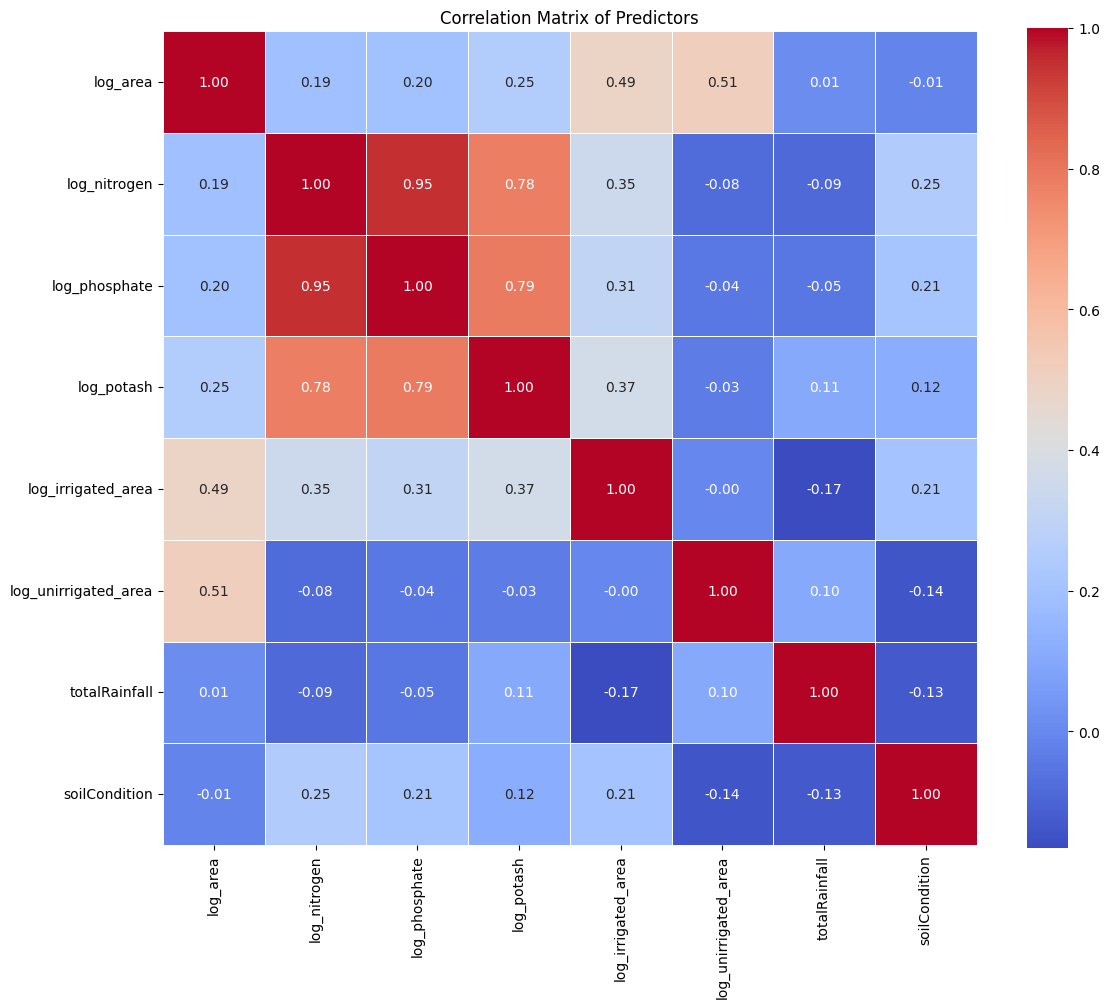

In [29]:
# COLLINEARITY DIAGNOSTICS
# Create correlation matrix for predictor variables

predictors = ['log_area', 'log_nitrogen', 'log_phosphate', 'log_potash',
              'log_irrigated_area', 'log_unirrigated_area', 'totalRainfall',
              'soilCondition']
correlationMatrix = maizeCleaned[predictors].corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlationMatrix, annot = True, fmt = ".2f", cmap = 'coolwarm',
            square = True, linewidths = 0.5)
plt.title('Correlation Matrix of Predictors')
plt.tight_layout()
plt.show()

In [30]:
# Calculate VIF for each predictor
X = maizeCleaned[predictors].dropna()
X = sm.add_constant(X)

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("COLLINEARITY DIAGNOSTICS")
print("Variance Inflation Factors (VIF > 5 indicates problematic collinearity):")
print(vif.sort_values('VIF', ascending = False))

COLLINEARITY DIAGNOSTICS
Variance Inflation Factors (VIF > 5 indicates problematic collinearity):
               Variable        VIF
0                 const  79.939947
2          log_nitrogen  11.037489
3         log_phosphate  10.916201
4            log_potash   3.139342
1              log_area   2.058017
5    log_irrigated_area   1.711294
6  log_unirrigated_area   1.581950
7         totalRainfall   1.152912
8         soilCondition   1.131864


In [31]:
# Refit model without problematic points
nonInfluential = ~(outliers | influentialPoints | highLeveragePoints)
refitModel = smf.ols(formula = formula, data = maizeCleaned[nonInfluential]).fit()

coefComparison = pd.DataFrame({
    'Original_Coefficient': model.params,
    'Robust_Coefficient': refitModel.params,
    'Percentage_Change': (refitModel.params - model.params) / model.params * 100
})

print("MODEL COEFFICIENTS COMPARISON")
print("Impact of Removing Problematic Points on Coefficients:")
print(coefComparison)

MODEL COEFFICIENTS COMPARISON
Impact of Removing Problematic Points on Coefficients:
                      Original_Coefficient  Robust_Coefficient  \
Intercept                        -0.914488            1.015474   
log_area                          1.355815            1.290430   
log_nitrogen                      0.182823           -0.094427   
log_phosphate                    -0.221638           -0.156598   
log_potash                        0.084128            0.182352   
log_irrigated_area                0.177394            0.124211   
log_unirrigated_area              0.034914            0.010873   
totalRainfall                    -0.000145           -0.000294   
soilCondition                    -0.002864           -0.001719   

                      Percentage_Change  
Intercept                   -211.042799  
log_area                      -4.822545  
log_nitrogen                -151.649480  
log_phosphate                -29.344977  
log_potash                   116.756581  
lo

In [32]:
techFactor2 = np.exp(refitModel.params.iloc[0])
significantInputs2 = [(var, refitModel.params[var]) for var in inputVars
                      if refitModel.pvalues[var] < 0.05]

estimatedFunction2 = f"Y = {techFactor2:.4f}"
for var, param in significantInputs2:
    varName = var.split('_')[1].capitalize()
    estimatedFunction2 += f" × {varName}^{param:.4f}"

print("Estimated Cobb-Douglas Production Function for Refit Model:")
print(estimatedFunction2)

Estimated Cobb-Douglas Production Function for Refit Model:
Y = 2.7607 × Area^1.2904 × Potash^0.1824 × Irrigated^0.1242


## Question 4

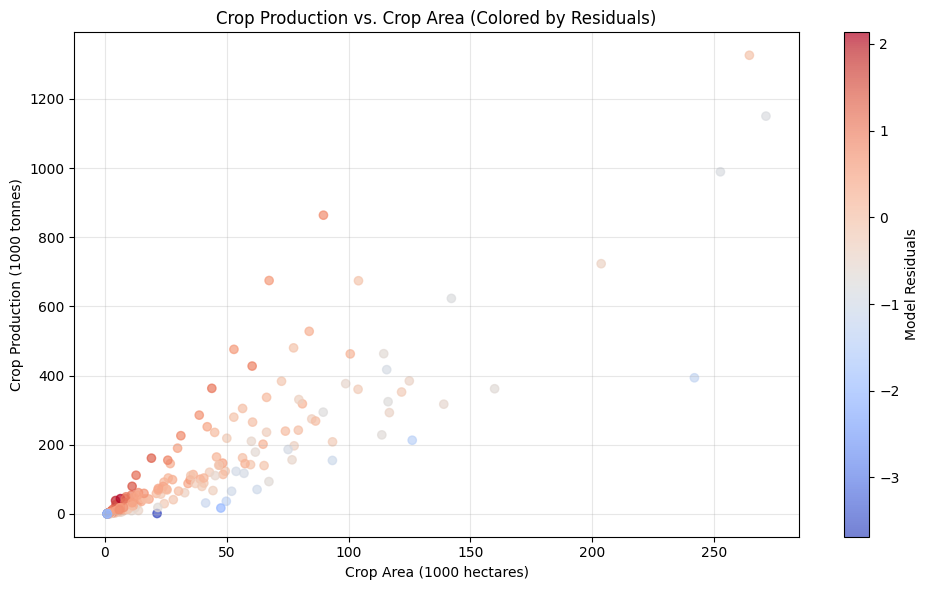

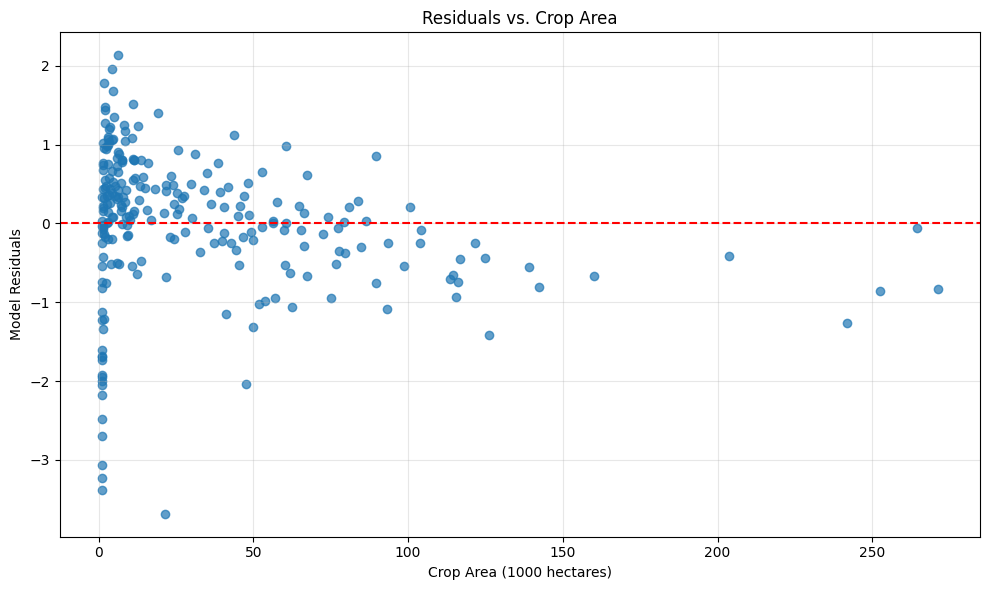

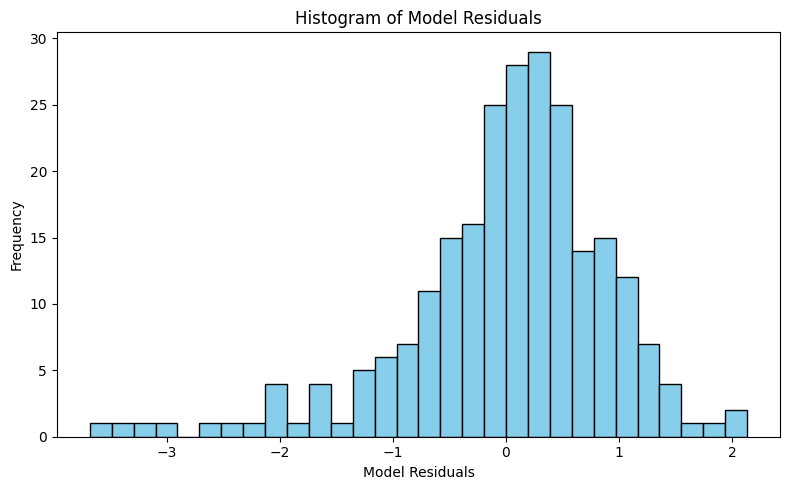

In [33]:
residuals = model.resid.values
area = maizeCleaned['totalAreaNew'].values
production = maizeCleaned['production1000tonnes'].values

minLen = min(len(area), len(production), len(residuals))
area = area[:minLen]
production = production[:minLen]
residuals = residuals[:minLen]

# Plot 1: Crop production vs. crop area, color by residuals
plt.figure(figsize=(10, 6))
sc = plt.scatter(area, production, c = residuals, cmap = 'coolwarm', alpha = 0.7)
plt.colorbar(sc, label = 'Model Residuals')
plt.xlabel('Crop Area (1000 hectares)')
plt.ylabel('Crop Production (1000 tonnes)')
plt.title('Crop Production vs. Crop Area (Colored by Residuals)')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

# Plot 2: Residuals vs. crop area
plt.figure(figsize = (10, 6))
plt.scatter(area, residuals, alpha=0.7)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Crop Area (1000 hectares)')
plt.ylabel('Model Residuals')
plt.title('Residuals vs. Crop Area')
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()

# Plot 3: Histogram of residuals
plt.figure(figsize = (8, 5))
plt.hist(residuals, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.xlabel('Model Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Model Residuals')
plt.tight_layout()
plt.show()

In [34]:
# Verify that the sum of residuals is zero
residualsSum = np.sum(residuals)
print(f"Sum of residuals: {residualsSum}")

Sum of residuals: -3.054623221032671e-11


## Question 5

In [35]:
coeffSum1 = model.params[1:].sum()
print(f"For the original model, returns to scale for overall inputs is {coeffSum1:.4f}")

if coeffSum1 > 1.05:
    print("The overall inputs exhibit increasing returns to scale")
elif coeffSum1 < 0.95:
    print("The overall inputs exhibit decreasing returns to scale")
else:
    print("The overall inputs exhibit approximately constant returns to scale")

For the original model, returns to scale for overall inputs is 1.6104
The overall inputs exhibit increasing returns to scale


In [36]:
# Fit regression model with only farmer-controlled inputs
fciFormula = (
    'log_production ~ log_area + log_nitrogen + log_phosphate + '
    'log_potash + log_irrigated_area + log_unirrigated_area'
)
fciModel = smf.ols(formula = fciFormula, data = maizeCleaned).fit()

# Sum of farmer-controlled coefficients
coeffSum2 = fciModel.params[1:].sum()
print(f"Returns to scale for farmer-controlled inputs: {coeffSum2:.4f}")

print(fciModel.summary())

Returns to scale for farmer-controlled inputs: 1.6119
                            OLS Regression Results                            
Dep. Variable:         log_production   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     269.5
Date:                Tue, 22 Apr 2025   Prob (F-statistic):          7.81e-102
Time:                        07:58:05   Log-Likelihood:                -319.87
No. Observations:                 240   AIC:                             653.7
Df Residuals:                     233   BIC:                             678.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [37]:
print("Hypothesis Test for inputs within Farmer's control")
print("Null Hypothesis (H0): The sum of input elasticities equals 1 (constant returns to scale)")
print("Alternative Hypothesis (H1): The sum of input elasticities does not equal 1 (variable returns to scale)")

Hypothesis Test for inputs within Farmer's control
Null Hypothesis (H0): The sum of input elasticities equals 1 (constant returns to scale)
Alternative Hypothesis (H1): The sum of input elasticities does not equal 1 (variable returns to scale)


In [38]:
# Perform F-test for Constant Returns to Scale
constraint = "log_area + log_nitrogen + log_phosphate + log_potash + log_irrigated_area + log_unirrigated_area = 1"
fciTest = fciModel.f_test(constraint)
print(f"F-statistic: {fciTest.fvalue:.4f}")

# 5% significance level
alpha = 0.05
if fciTest.pvalue < alpha:
    print(f"At {alpha * 100}% significance level: Reject H0")
    print("Conclusion: There is evidence that the production function does not exhibit constant returns to scale")
else:
    print(f"At {alpha * 100}% significance level: Fail to reject H0")
    print("Conclusion: There is insufficient evidence to reject the hypothesis of constant returns to scale")

F-statistic: 106.1280
At 5.0% significance level: Reject H0
Conclusion: There is evidence that the production function does not exhibit constant returns to scale


## Question 6

In [39]:
maizeCleanedB = maizeCleaned.copy()
maizeCleanedB.drop(columns = ['log_production', 'log_area', 'log_nitrogen', 'log_phosphate',
       'log_potash', 'log_irrigated_area', 'log_unirrigated_area'], axis = 1, inplace = True)

inputColumns = ['totalAreaNew', 'irrigatedAreaNew', 'unirrigatedArea',
               'nitrogenconsumptiontonnes',
               'phosphateconsumptiontonnes',
               'potashconsumptiontonnes']

# Generate squared terms and add to dataframe
for col in inputColumns:
    maizeCleanedB[f'{col}Squared'] = maizeCleanedB[col] ** 2

quadraticTerms = ' + '.join([f'{col} + {col}Squared' for col in inputColumns])
modelFormula = f'production1000tonnes ~ {quadraticTerms}'

quadraticModel = smf.ols(modelFormula, data = maizeCleanedB).fit()
print("Quadratic Production Function Results:")
print(quadraticModel.summary())

Quadratic Production Function Results:
                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.822
Model:                              OLS   Adj. R-squared:                  0.814
Method:                   Least Squares   F-statistic:                     95.93
Date:                  Tue, 22 Apr 2025   Prob (F-statistic):           4.61e-79
Time:                          07:58:05   Log-Likelihood:                -1393.1
No. Observations:                   240   AIC:                             2810.
Df Residuals:                       228   BIC:                             2852.
Df Model:                            11                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [40]:
print("Hypothesis Testing for Diminishing Marginal Returns:")
print("Null Hypothesis (H0): β_squared ≥ 0 (No diminishing returns)")
print("Alternative Hypothesis (H1): β_squared < 0 (Diminishing returns exist)")

Hypothesis Testing for Diminishing Marginal Returns:
Null Hypothesis (H0): β_squared ≥ 0 (No diminishing returns)
Alternative Hypothesis (H1): β_squared < 0 (Diminishing returns exist)


In [41]:
alpha = 0.05
diminishingResults = []

for inputVar in inputColumns:
    squaredTerm = f'{inputVar}Squared'
    coeff = quadraticModel.params[squaredTerm]

    # One-tailed test
    pValue = quadraticModel.pvalues[squaredTerm] / 2
    testResult = "Reject H0" if (coeff < 0 and pValue < alpha) else "Fail to reject H0"

    diminishingResults.append({
        'Input': inputVar,
        'Squared Coefficient': coeff,
        'p-value': pValue,
        'Conclusion': testResult
    })

resultsTable = pd.DataFrame(diminishingResults)
print(resultsTable.to_string(index = False))

                     Input  Squared Coefficient  p-value        Conclusion
              totalAreaNew         4.949533e-03 0.100671 Fail to reject H0
          irrigatedAreaNew        -2.367494e-02 0.026955         Reject H0
           unirrigatedArea        -5.426226e-04 0.450891 Fail to reject H0
 nitrogenconsumptiontonnes         6.897393e-10 0.414434 Fail to reject H0
phosphateconsumptiontonnes         1.850204e-08 0.163850 Fail to reject H0
   potashconsumptiontonnes        -6.001698e-08 0.014656         Reject H0


In [42]:
# Interpretation of results
print("Key Findings:")
for result in diminishingResults:
    if result['Conclusion'] == "Reject H0":
        print(f"- {result['Input']} shows significant evidence of diminishing marginal returns (β = {result['Squared Coefficient']:.4f}, p = {result['p-value']:.4f})")
    else:
        print(f"- {result['Input']} does not show significant evidence of diminishing marginal returns")

Key Findings:
- totalAreaNew does not show significant evidence of diminishing marginal returns
- irrigatedAreaNew shows significant evidence of diminishing marginal returns (β = -0.0237, p = 0.0270)
- unirrigatedArea does not show significant evidence of diminishing marginal returns
- nitrogenconsumptiontonnes does not show significant evidence of diminishing marginal returns
- phosphateconsumptiontonnes does not show significant evidence of diminishing marginal returns
- potashconsumptiontonnes shows significant evidence of diminishing marginal returns (β = -0.0000, p = 0.0147)


## Question 7

In [43]:
# Create interaction terms between irrigation and fertilizer inputs
maizeCleanedB['irrig_nitrogen'] = maizeCleanedB['irrigatedAreaNew'] * maizeCleanedB['nitrogenconsumptiontonnes']
maizeCleanedB['irrig_phosphate'] = maizeCleanedB['irrigatedAreaNew'] * maizeCleanedB['phosphateconsumptiontonnes']
maizeCleanedB['irrig_potash'] = maizeCleanedB['irrigatedAreaNew'] * maizeCleanedB['potashconsumptiontonnes']

# Fit complementarity model
complementFormula = modelFormula + ' + irrig_nitrogen + irrig_phosphate + irrig_potash'
complementModel = smf.ols(complementFormula, data = maizeCleanedB).fit()

print("Complementarity Model Results:")
print(complementModel.summary())

Complementarity Model Results:
                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.841
Model:                              OLS   Adj. R-squared:                  0.831
Method:                   Least Squares   F-statistic:                     84.98
Date:                  Tue, 22 Apr 2025   Prob (F-statistic):           1.80e-81
Time:                          07:58:05   Log-Likelihood:                -1379.8
No. Observations:                   240   AIC:                             2790.
Df Residuals:                       225   BIC:                             2842.
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [44]:
print("Hypothesis Tests for Input Complementarity:")
print("Null Hypothesis (H0): β_interaction ≤ 0 (No complementarity)")
print("Alternative Hypothesis (H1): β_interaction > 0 (Positive complementarity)")

Hypothesis Tests for Input Complementarity:
Null Hypothesis (H0): β_interaction ≤ 0 (No complementarity)
Alternative Hypothesis (H1): β_interaction > 0 (Positive complementarity)


In [45]:
complementarityResults = []
for fert in ['nitrogen', 'phosphate', 'potash']:
    interaction_term = f'irrig_{fert}'
    coeff = complementModel.params[interaction_term]

    # One-tailed test
    pValue = complementModel.pvalues[interaction_term] / 2
    test_result = "Reject H0" if (coeff > 0 and pValue < 0.05) else "Fail to reject H0"

    complementarityResults.append({
        'Fertilizer Type': fert.capitalize(),
        'Interaction Coefficient': coeff,
        'p-value': pValue,
        'Conclusion': test_result
    })

compResults = pd.DataFrame(complementarityResults)
print(compResults.to_string(index=False))

Fertilizer Type  Interaction Coefficient  p-value        Conclusion
       Nitrogen                -0.000047 0.009663 Fail to reject H0
      Phosphate                 0.000196 0.000022         Reject H0
         Potash                -0.000005 0.451124 Fail to reject H0


In [46]:
# Interpretation of results
print("Key Findings:")
for result in complementarityResults:
    if result['Conclusion'] == "Reject H0":
        print(f"- Significant complementarity found between irrigation and {result['Fertilizer Type']} (β = {result['Interaction Coefficient']:.4f}, p = {result['p-value']:.4f})")
    else:
        print(f"- No significant complementarity found between irrigation and {result['Fertilizer Type']}")

Key Findings:
- No significant complementarity found between irrigation and Nitrogen
- Significant complementarity found between irrigation and Phosphate (β = 0.0002, p = 0.0000)
- No significant complementarity found between irrigation and Potash


## Question 8

In [47]:
regionMap = {
    'chandigarh':               'Northern',
    'delhi':                    'Northern',
    'haryana':                  'Northern',
    'himachal pradesh':         'Northern',
    'jammu & kashmir':          'Northern',
    'punjab':                   'Northern',
    'rajasthan':                'Northern',
    'arunachal pradesh':        'North-Eastern',
    'assam':                    'North-Eastern',
    'manipur':                  'North-Eastern',
    'meghalaya':                'North-Eastern',
    'mizoram':                  'North-Eastern',
    'nagaland':                 'North-Eastern',
    'tripura':                  'North-Eastern',
    'andaman & nicobar islands':'Eastern',
    'bihar':                    'Eastern',
    'jharkhand':                'Eastern',
    'orissa':                   'Eastern',
    'sikkim':                   'Eastern',
    'west bengal':              'Eastern',
    'chhattisgarh':             'Central',
    'madhya pradesh':           'Central',
    'uttar pradesh':            'Central',
    'uttarakhand':              'Central',
    'dadra & nagar haveli':     'Western',
    'daman & diu':              'Western',
    'goa':                      'Western',
    'gujarat':                  'Western',
    'maharashtra':              'Western',
    'andhra pradesh':           'Southern',
    'karnataka':                'Southern',
    'kerala':                   'Southern',
    'lakshadweep':              'Southern',
    'pondicherry':              'Southern',
    'tamil nadu':               'Southern',
    'telangana':                'Southern'
}

maizeCleaned["fertTotal"] = (
    maizeCleaned['nitrogenconsumptiontonnes'] +
    maizeCleaned['phosphateconsumptiontonnes'] +
    maizeCleaned['potashconsumptiontonnes']
)
maizeCleaned["log_fert"] = np.log(maizeCleaned["fertTotal"])
maizeCleaned["irrig_fert"] = maizeCleaned["irrigatedAreaNew"] * maizeCleaned["fertTotal"]
maizeCleaned['region'] = maizeCleaned['statename'].str.lower().str.strip().map(regionMap)

maizeCleanedB["fertTotal"] = (
    maizeCleanedB['nitrogenconsumptiontonnes'] +
    maizeCleanedB['phosphateconsumptiontonnes'] +
    maizeCleanedB['potashconsumptiontonnes']
)
maizeCleanedB["fertTotalSquared"] = maizeCleanedB["fertTotal"] ** 2
maizeCleanedB["irrig_fert"] = maizeCleanedB["irrigatedAreaNew"] * maizeCleanedB["fertTotal"]
maizeCleanedB['region'] = maizeCleanedB['statename'].str.lower().str.strip().map(regionMap)

In [48]:
print("Hypothesis Tests for Regional Differences:")
print("Null Hypothesis (H0): No regional differences in production functions")
print("Alternative Hypothesis (H1): Significant regional differences exist")

Hypothesis Tests for Regional Differences:
Null Hypothesis (H0): No regional differences in production functions
Alternative Hypothesis (H1): Significant regional differences exist


In [49]:
maizeCleaned.columns

Index(['crop', 'production1000tonnes', 'statename',
       'nitrogenconsumptiontonnes', 'phosphateconsumptiontonnes',
       'potashconsumptiontonnes', 'districtname', 'totalRainfall',
       'totalAreaNew', 'irrigatedAreaNew', 'unirrigatedArea', 'soilCondition',
       'log_production', 'log_area', 'log_nitrogen', 'log_phosphate',
       'log_potash', 'log_irrigated_area', 'log_unirrigated_area', 'fertTotal',
       'log_fert', 'irrig_fert', 'region'],
      dtype='object')

In [50]:
# Cobb–Douglas Model with Region Interactions
formula_cd = (
    'log_production ~ C(region) * (log_area + log_irrigated_area + log_unirrigated_area + log_fert + totalRainfall)'
)
model_cd = smf.ols(formula_cd, data = maizeCleaned).fit()
print(model_cd.summary())

                            OLS Regression Results                            
Dep. Variable:         log_production   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     53.42
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.13e-84
Time:                        07:58:06   Log-Likelihood:                -290.23
No. Observations:                 240   AIC:                             652.5
Df Residuals:                     204   BIC:                             777.8
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [51]:
# Joint Wald test: are all region-specific interaction slopes zero?
inter_terms_cd = [t for t in model_cd.params.index if ':' in t]
if inter_terms_cd:
    hypothesis_cd = ' + '.join(f"{t} = 0" for t in inter_terms_cd)
    print("Wald test (Cobb–Douglas interactions):", model_cd.f_test(hypothesis_cd))

Wald test (Cobb–Douglas interactions): <F test: F=1.780761620843653, p=0.015956276749412985, df_denom=204, df_num=25>


In [52]:
maizeCleanedB.columns

Index(['crop', 'production1000tonnes', 'statename',
       'nitrogenconsumptiontonnes', 'phosphateconsumptiontonnes',
       'potashconsumptiontonnes', 'districtname', 'totalRainfall',
       'totalAreaNew', 'irrigatedAreaNew', 'unirrigatedArea', 'soilCondition',
       'totalAreaNewSquared', 'irrigatedAreaNewSquared',
       'unirrigatedAreaSquared', 'nitrogenconsumptiontonnesSquared',
       'phosphateconsumptiontonnesSquared', 'potashconsumptiontonnesSquared',
       'irrig_nitrogen', 'irrig_phosphate', 'irrig_potash', 'fertTotal',
       'fertTotalSquared', 'irrig_fert', 'region'],
      dtype='object')

In [53]:
# Quadratic Model with Region Interactions
formula_q = (
    'production1000tonnes ~ C(region) * ('
    'totalAreaNew + totalAreaNewSquared + '
    'irrigatedAreaNew + irrigatedAreaNewSquared + unirrigatedArea + unirrigatedAreaSquared + fertTotal + '
    'fertTotalSquared + totalRainfall)'
)
model_q = smf.ols(formula_q, data = maizeCleanedB).fit()
print(model_q.summary())

                             OLS Regression Results                             
Dep. Variable:     production1000tonnes   R-squared:                       0.927
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                     45.77
Date:                  Tue, 22 Apr 2025   Prob (F-statistic):           1.94e-82
Time:                          07:58:07   Log-Likelihood:                -1286.1
No. Observations:                   240   AIC:                             2678.
Df Residuals:                       187   BIC:                             2863.
Df Model:                            52                                         
Covariance Type:              nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [54]:
# Joint Wald test for quadratic interactions
inter_terms_q = [t for t in model_q.params.index if ':' in t]
if inter_terms_q:
    hypothesis_q = ' + '.join(f"{t} = 0" for t in inter_terms_q)
    print("\nWald test (Quadratic interactions):", model_q.f_test(hypothesis_q))


Wald test (Quadratic interactions): <F test: F=np.float64(5.118154233426203), p=1.297057978905117e-13, df_denom=187, df_num=34>


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 45, but rank is 34
  warnings.warn('covariance of constraints does not have full '


## Question 9

Between the Cobb-Douglas and Quadratic production models, we would prefer the Quadratic model. This preference is based on the following reasons:

Captures Diminishing Returns: The Quadratic model explicitly includes squared terms, allowing it to test and capture diminishing marginal productivity, which is a realistic feature of agricultural production.

Better Fit: The Quadratic model yielded a higher R-squared value indicating a better in-sample fit compared to the Cobb-Douglas model.

Greater Flexibility: While Cobb-Douglas assumes constant elasticities and smooth returns to scale, the Quadratic model can accommodate nonlinear relationships and turning points (e.g., peak productivity thresholds), making it more adaptable to real-world data.

However, Cobb-Douglas is more parsimonious and interpretable, especially useful when data is limited or multicollinearity is high. But given our dataset size and the clear presence of diminishing returns in inputs like land, the Quadratic model offers superior explanatory power.